In [7]:
!apt-get install -y python3-gdal
!pip install gdal

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-gdal is already the newest version (3.6.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


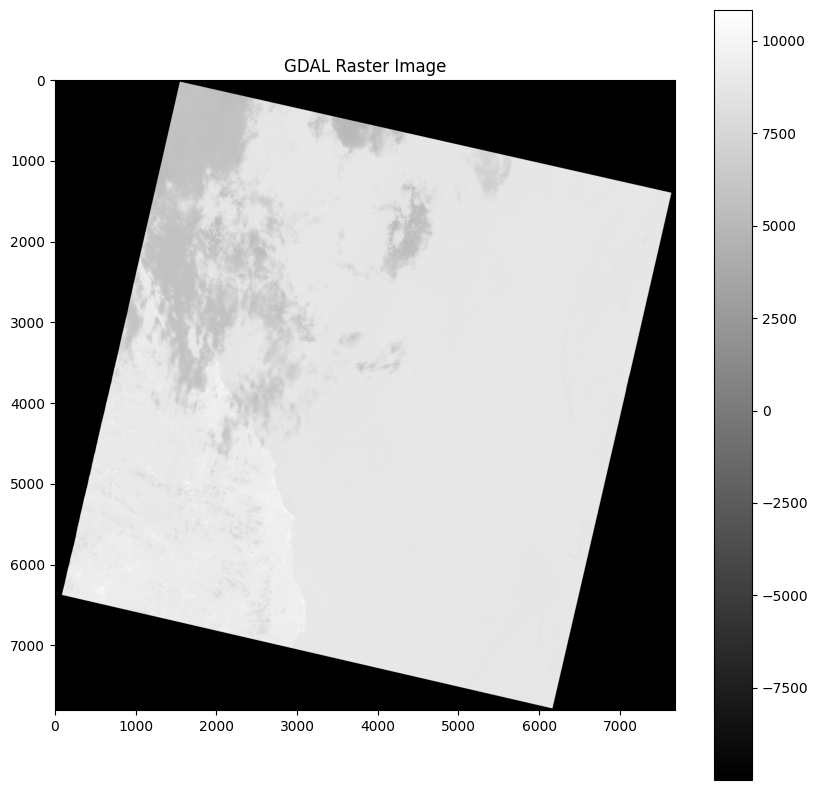

In [24]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

# GDAL 데이터셋 열기
dataset = gdal.Open('/content/LC09_L2SP_114034_20240807_20240808_02_T1_ST_TRAD.TIF', gdal.GA_ReadOnly)

# 첫 번째 밴드 읽기
band = dataset.GetRasterBand(1)
band_data = band.ReadAsArray()



# 밴드 데이터를 플롯으로 표시
plt.figure(figsize=(10, 10))
plt.imshow(band_data, cmap='gray')
plt.title('GDAL Raster Image')
plt.colorbar()
plt.show()


In [25]:
from osgeo import gdal

# 파일 정보 확인
print(f"파일 이름: {dataset.GetDescription()}")
print(f"밴드 수: {dataset.RasterCount}")
print(f"이미지 크기: {dataset.RasterXSize} x {dataset.RasterYSize}")
print(f"드라이버: {dataset.GetDriver().LongName}")

# 모든 밴드 시도
for i in range(1, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(i)
    band_data = band.ReadAsArray()
    print(f"밴드 {i}: {band_data is not None}, 데이터 크기: {band_data.shape if band_data is not None else 'N/A'}")


# 밴드 정보를 가져오기
band = dataset.GetRasterBand(1)

min_val, max_val = band.ComputeRasterMinMax()
print(f"밴드 1의 최소값: {min_val}, 최대값: {max_val}")
data_type = gdal.GetDataTypeName(band.DataType)
print(f"밴드 데이터 타입: {data_type}")

try:
    band_data = band.ReadAsArray()
    if band_data is not None:
        print(f"밴드 데이터가 성공적으로 읽혀짐, 데이터 크기: {band_data.shape}")
    else:
        print("밴드 데이터를 읽을 수 없음.")
except Exception as e:
    print(f"데이터 읽기 중 오류 발생: {e}")



파일 이름: /content/LC09_L2SP_114034_20240807_20240808_02_T1_ST_TRAD.TIF
밴드 수: 1
이미지 크기: 7681 x 7801
드라이버: GeoTIFF
밴드 1: True, 데이터 크기: (7801, 7681)
밴드 1의 최소값: 5070.0, 최대값: 10838.0
밴드 데이터 타입: Int16
밴드 데이터가 성공적으로 읽혀짐, 데이터 크기: (7801, 7681)


In [27]:
blue = dataset.GetRasterBand(1)

print(blue)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7a73e1947db0> >


In [39]:
# 밴드의 데이터 타입 코드 출력
datatype = blue.DataType
print('Band datatype: {dt}'.format(dt=datatype))

# 밴드의 데이터 타입 이름 출력
datatype_name = gdal.GetDataTypeName(blue.DataType)
print('Band datatype: {dt}'.format(dt=datatype_name))

bytes = gdal.GetDataTypeSize(blue.DataType)
print(f'Data type size: {bytes} bytes')

print('Band range: {minimum} - {maximum}'.format(maximum=band_max, minimum=band_min))

band_max, band_min, band_mean, band_stddev = blue.GetStatistics(0,1)
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))


bytes = gdal.GetDataTypeSize(datatype)



Band datatype: 3
Band datatype: Int16
Data type size: 16 bytes
Band range: 10838.0 - 5070.0
Band mean, stddev: 8520.4975515887, 867.99887526789



In [36]:
import numpy as np

image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount))

for b in range(dataset.RasterCount):
  band = dataset.GetRasterBand(b + 1)

  image[:, :, b] = band.ReadAsArray()

print(image)
print(image.dtype)

[[[-9999.]
  [-9999.]
  [-9999.]
  ...
  [-9999.]
  [-9999.]
  [-9999.]]

 [[-9999.]
  [-9999.]
  [-9999.]
  ...
  [-9999.]
  [-9999.]
  [-9999.]]

 [[-9999.]
  [-9999.]
  [-9999.]
  ...
  [-9999.]
  [-9999.]
  [-9999.]]

 ...

 [[-9999.]
  [-9999.]
  [-9999.]
  ...
  [-9999.]
  [-9999.]
  [-9999.]]

 [[-9999.]
  [-9999.]
  [-9999.]
  ...
  [-9999.]
  [-9999.]
  [-9999.]]

 [[-9999.]
  [-9999.]
  [-9999.]
  ...
  [-9999.]
  [-9999.]
  [-9999.]]]
float64


In [60]:
print(image.shape)

print('Green band mean : {r}'.format(r=image[:, 3].mean()))
print('NIR band mean: {nir}'.format(nir=image[:, 5].mean()))

b_green = 3
b_nir = 5

ndvi = (image[:, b_nir] - image[:, b_green]) / (image[:, b_green] + image[:, b_nir])

print(ndvi)
print(ndvi.max())

(7801, 7681, 1)
Green band mean : -9999.0
NIR band mean: -9999.0
[[-0.]
 [-0.]
 [-0.]
 ...
 [-0.]
 [-0.]
 [-0.]]
-0.0


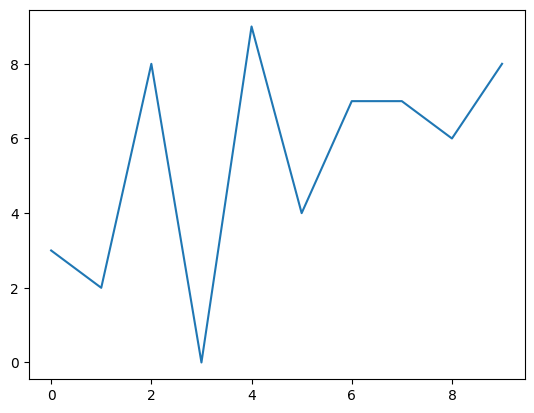

In [55]:
import matplotlib.pyplot as pit
%matplotlib inline

x = np.arange(10)

y = np.random.randint(0, 10, size=10)

plt.plot(x, y)

In [56]:
index = np.array([4, 3, 2])
colors = image[:, :, index].astype(np.float64)

max_val = 8000
min_val = 0

colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
  colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)

plt.subplot(121)
plt.imshow(colors)

plt.subplot(122)
plt.imshow(ndwi, cmap=plt.cm.Greys_r)

IndexError: index 4 is out of bounds for axis 2 with size 1

In [ ]:
from osgeo import gdal_array, osr

gdal_array.savearray('.ndwi.tif', ndwi)

